# Viki

## Mehmet Kubilay Gülaçdı - Veri Bilimci
## Ayda Nil Özyürek - Bilgisayar Mühendisi

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import statsmodels.stats.api as sms

pd.options.display.float_format = '{:.3f}'.format

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/odeal-data/hackathon_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/odeal-data/hackathon_data.csv")
df.head()

/tmp/ipykernel_32/2837204550.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/odeal-data/hackathon_data.csv")


,id,Marka,IsyeriTipi,UyeDurum,UyeAdres,Sehir,UyeAktivasyonTarih,IslemID,IslemTarih,IslemTutar,Tercih,Versiyon,SurumTarih
0,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,401003136,2015-09-18 14:35:04,5.000,CeptePos,NaN,NaN
1,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403526702,2019-04-13 13:31:00,32.700,ÖKC,NaN,NaN
2,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403529006,2019-04-13 19:30:00,998.050,ÖKC,NaN,NaN
3,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403530803,2019-04-14 13:52:00,105.750,ÖKC,NaN,NaN
4,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403531107,2019-04-14 15:09:00,163.000,ÖKC,NaN,NaN


# Data Preprocessing Part 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   Marka               1000000 non-null  object 
 2   IsyeriTipi          1000000 non-null  object 
 3   UyeDurum            1000000 non-null  object 
 4   UyeAdres            1000000 non-null  object 
 5   Sehir               1000000 non-null  object 
 6   UyeAktivasyonTarih  1000000 non-null  object 
 7   IslemID             1000000 non-null  int64  
 8   IslemTarih          1000000 non-null  object 
 9   IslemTutar          1000000 non-null  float64
 10  Tercih              1000000 non-null  object 
 11  Versiyon            23643 non-null    object 
 12  SurumTarih          23643 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 99.2+ MB


In [4]:
# Change column names to lower case for ease of operation
df.columns = [col.lower() for col in df.columns]

In [5]:
# surumtarih and uyeaktivasyontarih are date values so we need to convert as date type

df["uyeaktivasyontarih"] = df["uyeaktivasyontarih"].apply(lambda row: dt.strptime(row, "%Y-%m-%d %H:%M:%S"))
df["islemtarih"] = df["islemtarih"].apply(lambda row: dt.strptime(row, "%Y-%m-%d %H:%M:%S"))

In [6]:
# Select columns
cols = df.columns

# Date columns
date_cols = df.select_dtypes(include="datetime").columns

# Numerical variables
num_cols = [col for col in cols if df[col].dtype != "O" and col not in date_cols]
num_but_cat = [col for col in num_cols if df[col].nunique() < 10] # Detect categorical variables look like numerical(binary)

num_cols = [col for col in num_cols if col not in num_but_cat] # Eliminate categorical variables look like numerical

# these are non-descriptive numericals so we removed
num_cols.remove("id")
num_cols.remove("islemid")

cat_cols = [col for col in cols if df[col].dtype == "O"]

cat_cols = cat_cols + num_but_cat

In [7]:
print(f"Columns({len(cols)}): ", cols.values, "\n")
print(f"Categorical columns({len(cat_cols)}): ", cat_cols, "\n")
print(f"Numerical columns({len(num_cols)}): ", num_cols, "\n")
print(f"Date columns({len(date_cols)}): ", date_cols.values, "\n")

# id and islemid could be high cardinal categorical

Columns(13):  ['id' 'marka' 'isyeritipi' 'uyedurum' 'uyeadres' 'sehir'
 'uyeaktivasyontarih' 'islemid' 'islemtarih' 'islemtutar' 'tercih'
 'versiyon' 'surumtarih'] 

Categorical columns(8):  ['marka', 'isyeritipi', 'uyedurum', 'uyeadres', 'sehir', 'tercih', 'versiyon', 'surumtarih'] 

Numerical columns(1):  ['islemtutar'] 

Date columns(2):  ['uyeaktivasyontarih' 'islemtarih'] 



# EDA

In [8]:
df.shape

(1000000, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1000000 non-null  int64         
 1   marka               1000000 non-null  object        
 2   isyeritipi          1000000 non-null  object        
 3   uyedurum            1000000 non-null  object        
 4   uyeadres            1000000 non-null  object        
 5   sehir               1000000 non-null  object        
 6   uyeaktivasyontarih  1000000 non-null  datetime64[ns]
 7   islemid             1000000 non-null  int64         
 8   islemtarih          1000000 non-null  datetime64[ns]
 9   islemtutar          1000000 non-null  float64       
 10  tercih              1000000 non-null  object        
 11  versiyon            23643 non-null    object        
 12  surumtarih          23643 non-null    object        
dtypes: datetime64

In [10]:
df[cols].nunique()

id                         39
marka                      39
isyeritipi                  3
uyedurum                    2
uyeadres                   39
sehir                      12
uyeaktivasyontarih         39
islemid               1000000
islemtarih             778949
islemtutar              22586
tercih                      3
versiyon                   36
surumtarih              23631
dtype: int64

In [11]:
# Check null values

df.isnull().sum()

id                         0
marka                      0
isyeritipi                 0
uyedurum                   0
uyeadres                   0
sehir                      0
uyeaktivasyontarih         0
islemid                    0
islemtarih                 0
islemtutar                 0
tercih                     0
versiyon              976357
surumtarih            976357
dtype: int64

In [12]:
# Check duplicated values

df.duplicated().sum().any()

False

## Numerical Analysis

In [13]:
df[num_cols].nunique()

islemtutar    22586
dtype: int64

In [14]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
islemtutar,1000000.000,144.469,505.856,1.010,25.000,50.000,101.000,100000.000


- Ortalama median değerin neredeyse 3 katı dolayısıyla positively skewed bir dağılım yapısı mevcut olabilir

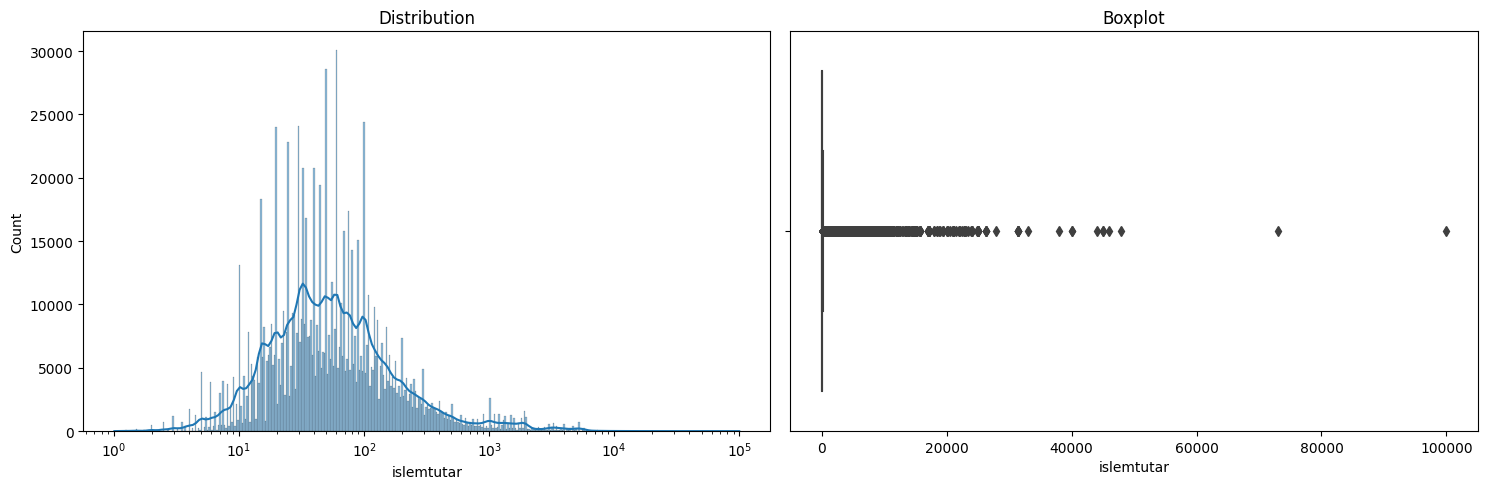

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="islemtutar", log_scale=True, kde=True)
plt.title("Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="islemtutar")
plt.title("Boxplot")

plt.tight_layout()
plt.show()

- **islemtutar** değişkeninde aykırı değerler mevcut.

In [16]:
# Her bir müşteri ne kadar işlem yapmış?
df_transaction_count = df.groupby("id").agg({"islemid": ["count"]})["islemid"].sort_values(by="count", ascending=False)
df_transaction_count

,count
id,
301025608,156603
301026840,78259
301032425,52465
301025172,49235
301006906,47613
301033049,34514
301031272,33832
301024729,30742
301003354,30616


In [17]:
df_transaction_count.describe().T

,count,mean,std,min,25%,50%,75%,max
count,39.000,25641.026,26538.854,2.000,15328.000,18673.000,29036.000,156603.000


- Bazı değerler outlier. Her bir müşteri ortalama ne kadar işlem yapıyor onu merak ediyorum. Direkt ortalama almak yanıltıcı ve sığ bir sonuç verebilir. Dolayısıyla güven aralığına bir bakalım.

In [18]:
# Toplam işlem sayısı güven aralığı
sms.DescrStatsW(df_transaction_count["count"]).tconfint_mean()

(17038.1244263779, 34243.92685567338)

- Veri setindeki müşteriler %95 güven aralığı ile ortalama 17038 ile 34243 işlem yapıyor.

In [19]:
# Toplam işlem hacmi

# Müşteri özelinde toplam hacim
df_customer_volume=df.groupby("id")["islemtutar"].sum().sort_values(ascending=False)
df_customer_volume

id
301023021   21967130.960
301009682   19729153.600
301025608   12477600.410
301021277   11484870.630
301026224   10636344.660
301002470    7336237.240
301032425    5381687.900
301031272    5116620.730
301019658    4979624.900
301015331    4813767.770
301026840    3601608.100
301020464    3360962.510
301003354    2824086.730
301025172    2640420.330
301006906    2625627.540
301031339    2338707.810
301030119    2333811.070
301014561    2268175.210
301026135    2251433.010
301033049    1748947.070
301027114    1713862.320
301009366    1600709.590
301029860    1517415.690
301026287    1390167.810
301032496    1122833.540
301026102    1121508.940
301024729    1029485.340
301012873    1016291.940
301026648     914621.440
301031149     804918.380
301024520     767724.720
301030448     558967.490
301010389     538330.900
301029464     451458.730
301002583       2044.920
301009412       1228.170
301025251        500.000
301026958         35.250
301018129         20.000
Name: islemtutar, dtyp

In [20]:
# Toplam Hacim

df_customer_volume.sum()

144468943.34999996

## Categorical Analysis

In [21]:
df[cat_cols].nunique()

marka            39
isyeritipi        3
uyedurum          2
uyeadres         39
sehir            12
tercih            3
versiyon         36
surumtarih    23631
dtype: int64

In [22]:
# Cardinality düşük kategorik değişkenler
cat_cols_not_car = [col for col in cat_cols if df[col].nunique() < 20]
cat_cols_not_car

['isyeritipi', 'uyedurum', 'sehir', 'tercih']

In [23]:
for col in cat_cols:
    print(df[col].value_counts(), "\n")

marka
Nfka nu yufka    156603
Eket ermarket     78259
Aziz ab leziz     52465
Biye bakaliye     49235
Hdeo he video     47613
Öket özmarket     34514
Blas burillas     33832
Aüfe ass büfe     30742
Aida aka gida     30616
Kıda kaz gıda     29082
Mand mad land     28990
Bant baaurant     27735
Aket akmarket     26731
Wsky woversky     25489
Kzar kü pazar     24792
Bant boaurant     22879
Eşti ekd. şti     21588
Hiye hatasiye     19129
Took tatawook     19101
Dkli doymakli     18673
Oden o- maden     18351
Alik arncilik     18257
Örek öz börek     18004
Asua axaxesua     17642
Bkal babakkal     17531
Giye göhafiye     17233
Ayon arvasyon     16844
Kayi kol bayi     16228
Sesi suzanesi     15463
Küfe kar büfe     15193
Wtma waarıtma     14961
Öeti ödirketi     13794
Hs 3 hy sis 3     12117
Rimi renetimi     10150
Teri tejileri       143
Ezgi ezezgi          10
Llım leazılım         5
Hkek haan kek         4
Ka.ş kiva a.ş         2
Name: count, dtype: int64 

isyeritipi
Şahıs Şirketi    69

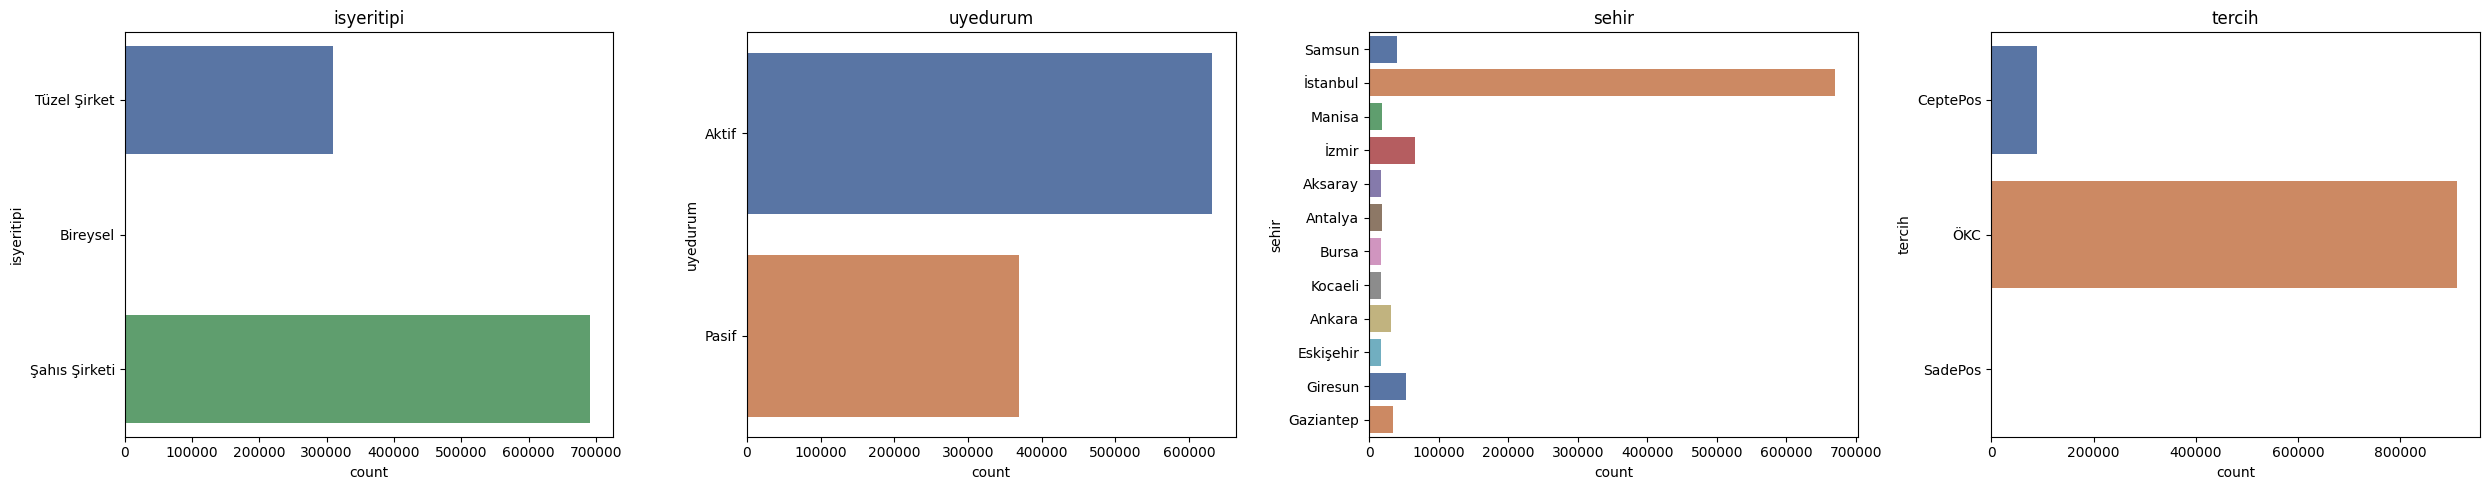

In [24]:
# Countplot of Categorical
n_cols = 4
n_rows = 1
fig, axs = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))

for i, column in enumerate(cat_cols_not_car):
    row_index = i // n_cols
    col_index = i % n_cols
    
    sns.countplot(y=df[column], ax=axs[col_index], palette="deep")
    axs[col_index].set_title(f"{column}")
    

for i in range(len(cat_cols), n_cols * n_rows):
    fig.delaxes(plt.gca())

plt.tight_layout()
plt.show()

# RFM Segmentation

In [25]:
df["islemtarih"].max() # Analiz tarihini belirlemek için bu tarihe 3-4 gün ekliyoruz.

Timestamp('2023-10-26 16:59:00')

In [26]:
import datetime
today_date = datetime.datetime(2023, 10, 30)

# Analiz temsili tarihi 30 Ekim 2023

In [27]:
df.head()

,id,marka,isyeritipi,uyedurum,uyeadres,sehir,uyeaktivasyontarih,islemid,islemtarih,islemtutar,tercih,versiyon,surumtarih
0,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,401003136,2015-09-18 14:35:04,5.000,CeptePos,NaN,NaN
1,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403526702,2019-04-13 13:31:00,32.700,ÖKC,NaN,NaN
2,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403529006,2019-04-13 19:30:00,998.050,ÖKC,NaN,NaN
3,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403530803,2019-04-14 13:52:00,105.750,ÖKC,NaN,NaN
4,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403531107,2019-04-14 15:09:00,163.000,ÖKC,NaN,NaN


In [28]:
# Tüm müşteriler
rfm = df.groupby("id").agg({"islemtarih": lambda date: (today_date - date.max()).days, 
                           "islemid": lambda num: num.nunique(),
                           "islemtutar": lambda price: price.sum()})

rfm.columns = ["recency", "frequency", "monetary"]

- **Recency**: Müşterinin yaptığı son işlemden günümüze ne kadar süre geçti? Müşteri ne kadar güncel?/Yenilik/Sıcaklık
- **Frequency**: Müşterini ne kadar sık işlem yapıyor(toplam işlem sayısı)
- **Monetary**: Parasal değer

In [29]:
rfm.head()

,recency,frequency,monetary
id,,,
301002470,3,24792,7336237.240
301002583,1040,143,2044.920
301003354,3,30616,2824086.730
301006906,412,47613,2625627.540
301009366,405,19129,1600709.590


In [30]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,39.000,339.462,551.556,3.000,3.000,26.000,408.500,1923.000
frequency,39.000,25641.026,26538.854,2.000,15328.000,18673.000,29036.000,156603.000
monetary,39.000,3704331.881,5083029.295,20.000,859769.910,1748947.070,4207687.935,21967130.960


In [31]:
# Üyelik durumu pasif olan müşterilerin rfm değerleri
id_pasif = df[df["uyedurum"] == "Pasif"]["id"].unique()

In [32]:
rfm.loc[id_pasif].describe().T

,count,mean,std,min,25%,50%,75%,max
recency,17.000,643.941,640.885,26.000,111.000,405.000,1040.000,1923.000
frequency,17.000,21679.941,19615.951,2.000,15463.000,18351.000,28990.000,78259.000
monetary,17.000,1333757.248,1360215.298,20.000,451458.730,1029485.340,1713862.320,4979624.900


- 39 müşterinin 17 tanesi pasif durumda
- Üyelik durumu pasif olan müşterilerin son işlem tarihinden günümüze ortalama 643 gün geçmiş. En güncel müşteri 26 gün önce işlem yapmış.
- Pasif müşteriler ortalama 21679 tane işlem sıklığına sahip
- Ortalama işlem hacimleri 1333757

In [33]:
# RFM Skorlarını oluşturma
rfm["recency_score"] = pd.qcut(rfm["recency"].rank(method="first"), q=5, labels=[5, 4, 3, 2 ,1]) # recency yüksekse değeri düşük olmalı
rfm["monetary_score"] = pd.qcut(rfm["monetary"], q=5, labels=[1, 2, 3, 4, 5])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

In [34]:
rfm.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score
id,,,,,,
301002470,3,24792,7336237.240,5,5,4
301002583,1040,143,2044.920,1,1,1
301003354,3,30616,2824086.730,5,4,4
301006906,412,47613,2625627.540,2,4,5
301009366,405,19129,1600709.590,2,3,3


In [35]:
rfm["rfm_scores"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm["segment"] = rfm["rfm_scores"].replace(seg_map, regex=True)

In [36]:
rfm.head()

# Segmentasyon işlemimiz bitti. Aşağıdaki RFM grafiğine göre müşterilerimiz segmente edilmiştir.

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segment
id,,,,,,,,
301002470,3,24792,7336237.240,5,5,4,54,champions
301002583,1040,143,2044.920,1,1,1,11,hibernating
301003354,3,30616,2824086.730,5,4,4,54,champions
301006906,412,47613,2625627.540,2,4,5,25,cant_loose
301009366,405,19129,1600709.590,2,3,3,23,at_Risk


![](https://www.slidesalad.com/wp-content/uploads/2020/07/RFM-Customer-Segmentation-Model-PowerPoint-Templates-Diagrams-0006.jpg)

In [37]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency           monetary      
                        mean count      mean count         mean count
segment                                                              
about_to_sleep        14.500     2  8618.500     2  1167519.620     2
at_Risk              829.200     5 20629.400     5  1099467.186     5
cant_loose           202.000     4 47782.000     4  2251417.013     4
champions              3.000     3 26965.667     3  4991363.913     3
hibernating         1146.143     7  7142.571     7   452773.547     7
loyal_customers       16.375     8 49820.250     8  4430792.354     8
need_attention        66.000     1 18257.000     1   558967.490     1
new_customers          3.000     1 10150.000     1 11484870.630     1
potential_loyalists    3.000     6 17452.167     6  4898956.832     6
promising              3.000     2 12955.500     2 16301737.810     2

# CLTV 

In [38]:
last_order = df.groupby("id").agg({"islemtarih": "max"})
first_order = df.groupby("id").agg({"islemtarih": "min"})
today_date = datetime.datetime(2023, 10, 30)

cltv_df = pd.DataFrame()
cltv_df["recency_cltv_weekly"] = (last_order - first_order)
cltv_df["recency_cltv_weekly"] = cltv_df["recency_cltv_weekly"].dt.days / 7

In [39]:
df.head()

,id,marka,isyeritipi,uyedurum,uyeadres,sehir,uyeaktivasyontarih,islemid,islemtarih,islemtutar,tercih,versiyon,surumtarih
0,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,401003136,2015-09-18 14:35:04,5.000,CeptePos,NaN,NaN
1,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403526702,2019-04-13 13:31:00,32.700,ÖKC,NaN,NaN
2,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403529006,2019-04-13 19:30:00,998.050,ÖKC,NaN,NaN
3,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403530803,2019-04-14 13:52:00,105.750,ÖKC,NaN,NaN
4,301002470,Kzar kü pazar,Tüzel Şirket,Aktif,KALE MAH. GAZİ CAD. 82 C İLKADIM/ SAMSUN,Samsun,2015-09-08 15:08:23,403531107,2019-04-14 15:09:00,163.000,ÖKC,NaN,NaN


In [40]:
# total islem

cltv_df = df.groupby("id").agg({"islemtutar": "sum",
                               "id": "count"})



In [41]:
cltv_df.head()

,islemtutar,id
id,,
301002470,7336237.240,24792
301002583,2044.920,143
301003354,2824086.730,30616
301006906,2625627.540,47613
301009366,1600709.590,19129


In [42]:
cltv_df.columns = ["total_volume", "transaction"]

In [43]:
cltv_df.head()

,total_volume,transaction
id,,
301002470,7336237.240,24792
301002583,2044.920,143
301003354,2824086.730,30616
301006906,2625627.540,47613
301009366,1600709.590,19129


In [44]:
churn_count = df[df["uyedurum"] == "Pasif"].shape
churn_rate = churn_count[0] / df.shape[0]
churn_rate

0.368559

In [45]:
cltv_df["average_order_value"] = cltv_df["total_volume"] / cltv_df["transaction"]
cltv_df["purchase_frequency"] = cltv_df["transaction"] / cltv_df.index.nunique()

cltv_df["profit_margin"] = cltv_df["total_volume"] * 0.10

cltv_df["customer_value"] = cltv_df["average_order_value"] * cltv_df["purchase_frequency"]

# CLTV

cltv_df["cltv"] = (cltv_df["customer_value"] / churn_rate) * cltv_df["profit_margin"]

In [46]:
cltv_df

,total_volume,transaction,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
id,,,,,,,
301002470,7336237.240,24792,295.911,635.692,733623.724,188108.647,374433852545.773
301002583,2044.920,143,14.300,3.667,204.492,52.434,29092.498
301003354,2824086.730,30616,92.242,785.026,282408.673,72412.480,55486129650.481
301006906,2625627.540,47613,55.145,1220.846,262562.754,67323.783,47961704623.617
301009366,1600709.590,19129,83.680,490.487,160070.959,41043.836,17825982087.257
301009412,1228.170,4,307.043,0.103,122.817,31.492,10494.103
301009682,19729153.600,14961,1318.706,383.615,1972915.360,505875.733,2707978924797.923
301010389,538330.900,16844,31.960,431.897,53833.090,13803.356,2016169264.447
301012873,1016291.940,21588,47.077,553.538,101629.194,26058.768,7185638004.234


In [47]:
cltv_df["segment"] = pd.qcut(cltv_df["cltv"], 4, labels= ["D", "C", "B", "A"])

In [48]:
cltv_df.head()

,total_volume,transaction,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
id,,,,,,,,
301002470,7336237.240,24792,295.911,635.692,733623.724,188108.647,374433852545.773,A
301002583,2044.920,143,14.300,3.667,204.492,52.434,29092.498,D
301003354,2824086.730,30616,92.242,785.026,282408.673,72412.480,55486129650.481,B
301006906,2625627.540,47613,55.145,1220.846,262562.754,67323.783,47961704623.617,B
301009366,1600709.590,19129,83.680,490.487,160070.959,41043.836,17825982087.257,C


In [49]:
cltv_df.groupby("segment").agg({"count", "sum", "mean"})

total_volume                     transaction                \
                mean count           sum        mean count     sum   
segment                                                              
D         312522.856    10   3125228.560    9848.700    10   98487   
C        1317584.368    10  13175843.680   23180.400    10  231804   
B        2693870.257     9  24244832.310   33625.222     9  302627   
A       10392303.880    10 103923038.800   36708.200    10  367082   

        average_order_value                purchase_frequency  ...           \
                       mean count      sum               mean  ...      sum   
segment                                                        ...            
D                    59.759    10  597.594            252.531  ... 2525.308   
C                    60.522    10  605.218            594.369  ... 5943.692   
B                   102.693     9  924.233            862.185  ... 7759.667   
A                   595.644    10 5956.445            941.236  ... 9412.359   

        profit_margin                    customer_value                    \
                 mean count          sum           mean count         sum   
segment                                                                     
D           31252.286    10   312522.856       8013.407    10   80134.066   
C          131758.437    10  1317584.368      33784.215    10  337842.146   
B          269387.026     9  2424483.231      69073.596     9  621662.367   
A         1039230.388    10 10392303.880     266469.330    10 2664693.303   

                    cltv                          
                    mean count               sum  
segment                                           
D         1421586804.748    10   14215868047.483  
C        12690649623.891    10  126906496238.915  
B        51976240946.862     9  467786168521.762  
A       994483443154.242    10 9944834431542.420  

[4 rows x 21 columns]

In [50]:
rfm["cltv_segment"] = cltv_df["segment"]

In [51]:
rfm

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segment,cltv_segment
id,,,,,,,,,
301002470,3,24792,7336237.240,5,5,4,54,champions,A
301002583,1040,143,2044.920,1,1,1,11,hibernating,D
301003354,3,30616,2824086.730,5,4,4,54,champions,B
301006906,412,47613,2625627.540,2,4,5,25,cant_loose,B
301009366,405,19129,1600709.590,2,3,3,23,at_Risk,C
301009412,26,4,1228.170,3,1,1,31,about_to_sleep,D
301009682,3,14961,19729153.600,5,5,2,52,potential_loyalists,A
301010389,1267,16844,538330.900,1,1,2,12,hibernating,D
301012873,3,21588,1016291.940,5,2,3,53,potential_loyalists,C


# KOBİ Segmentasyonu

250 kişiden az çalışan istihdam eden, yıllık net satış hasılatı veya mali bilançosundan herhangi biri 500 milyon lirayı aşmayan işletmeler KOBİ olarak tanımlanacak.

In [52]:
rfm["KOBİ"] = np.where(rfm["monetary"] < 500000, "Evet", "Hayır")

In [53]:
rfm.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segment,cltv_segment,KOBİ
id,,,,,,,,,,
301002470,3,24792,7336237.240,5,5,4,54,champions,A,Hayır
301002583,1040,143,2044.920,1,1,1,11,hibernating,D,Evet
301003354,3,30616,2824086.730,5,4,4,54,champions,B,Hayır
301006906,412,47613,2625627.540,2,4,5,25,cant_loose,B,Hayır
301009366,405,19129,1600709.590,2,3,3,23,at_Risk,C,Hayır


In [54]:
rfm["segment"].value_counts()

segment
loyal_customers        8
hibernating            7
potential_loyalists    6
at_Risk                5
cant_loose             4
champions              3
about_to_sleep         2
promising              2
new_customers          1
need_attention         1
Name: count, dtype: int64

In [56]:
rfm[rfm.index == 301002470]["segment"].values[0]

'champions'

In [57]:
rfm.to_csv("segment_df.csv")

In [59]:
rfm

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_scores,segment,cltv_segment,KOBİ
id,,,,,,,,,,
301002470,3,24792,7336237.240,5,5,4,54,champions,A,Hayır
301002583,1040,143,2044.920,1,1,1,11,hibernating,D,Evet
301003354,3,30616,2824086.730,5,4,4,54,champions,B,Hayır
301006906,412,47613,2625627.540,2,4,5,25,cant_loose,B,Hayır
301009366,405,19129,1600709.590,2,3,3,23,at_Risk,C,Hayır
301009412,26,4,1228.170,3,1,1,31,about_to_sleep,D,Evet
301009682,3,14961,19729153.600,5,5,2,52,potential_loyalists,A,Hayır
301010389,1267,16844,538330.900,1,1,2,12,hibernating,D,Hayır
301012873,3,21588,1016291.940,5,2,3,53,potential_loyalists,C,Hayır
